#  Duplicates Analysis 

**Import packages**

In [5]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

**Load raw data**

In [6]:
src = pd.read_csv(r'./FInalDataset.csv')

C:\Users\kredfield\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Clean out NaN rows**

In [7]:
df = src.dropna(axis=0, how='all')

**Explore raw data** 

In [8]:
df.head(2)

,EnterpriseID,LAST,FIRST,MIDDLE,SUFFIX,DOB,GENDER,SSN,ADDRESS1,ADDRESS2,ZIP,MOTHERS_MAIDEN_NAME,MRN,CITY,STATE,PHONE,PHONE2,EMAIL,ALIAS
0,"13,125,316.00",BERRYMAN,MARTHA,NaN,NaN,8/6/1993,FEMALE,857-46-5079,1120 CLAY AVE,4G,10456,NaN,nan,BRONX,NY,732-461-9820,NaN,NaN,NaN
1,"14,423,865.00",DESCHOMP,HAROLD,NaN,NaN,6/13/1973,MALE,822-36-9891,1172 E 73RD ST,PVT,11224,NaN,nan,BROOKLYN,NY,929-275-3170,NaN,NaN,NaN


In [9]:
print('Number of Records:',len(df))
print('Total SSNs:',len(df.SSN.dropna()))
print('Unique SSNs:',len(df.groupby(['SSN'])))
print('Total DOBs:',len(df.DOB.dropna()))
print('Total First Names:',len(df.FIRST.dropna()))
print('Total Last Names:',len(df.LAST.dropna()))

Number of Records: 1000000
Total SSNs: 755394
Unique SSNs: 428699
Total DOBs: 983537
Total First Names: 966116
Total Last Names: 966743


## Plotting Number of Duplicates

In [10]:
def group_counts(df,column_label):
    df_group = df[column_label].value_counts().value_counts().reset_index().sort_values(by='index')
    df_group.columns = [column_label + '_Count_Group','Number_of_' + column_label]
    return df_group

In [11]:
def show_analysis(df,column_label,limit=0):
    if limit == 0:
        limit = len(df)
    group = group_counts(df,column_label)
    print(group.head())
    group[group[column_label+'_Count_Group']<limit].plot(x=column_label+'_Count_Group', y='Number_of_'+column_label, kind='line')
    plt.title('Number of Unique ' + column_label + 's with Specified Count')

**SSN**

**The way to interpret this information is as follows:
There are over 300,000 SSNs that appear twice in the dataset.**

    SSN_Count_Group  Number_of_SSN
1                 1         103417
0                 2         324681
2                 3            572
12               13              1
13               15              1


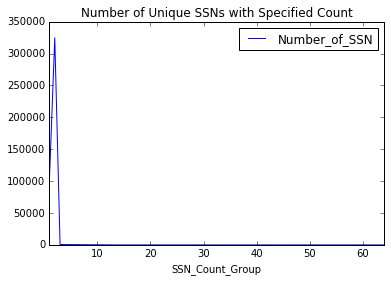

In [12]:
show_analysis(df,'SSN')

**Below we zoom into the most common count groups.**

    SSN_Count_Group  Number_of_SSN
1                 1         103417
0                 2         324681
2                 3            572
12               13              1
13               15              1


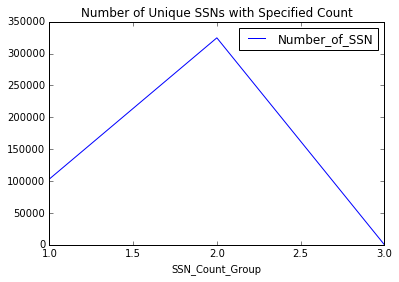

In [13]:
show_analysis(df,'SSN',4)

**Names**

In [14]:
df['Full_Name'] = df.FIRST + ' ' + df.LAST

C:\Users\kredfield\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


   Full_Name_Count_Group  Number_of_Full_Name
0                      1               632429
1                      2                79763
2                      3                14707
3                      4                 5450
4                      5                 2713


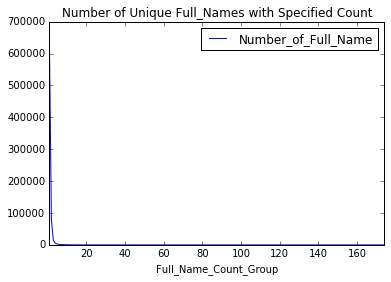

In [15]:
show_analysis(df,'Full_Name')

   Full_Name_Count_Group  Number_of_Full_Name
0                      1               632429
1                      2                79763
2                      3                14707
3                      4                 5450
4                      5                 2713


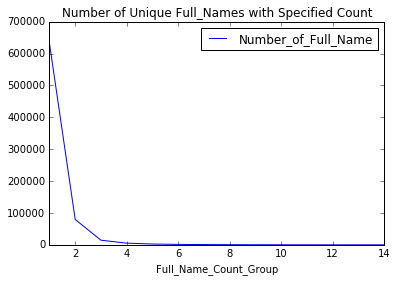

In [16]:
show_analysis(df,'Full_Name',15)

**Address**

In [17]:
df['Full_Address'] = df.ADDRESS1 + ', ' + df.ADDRESS2 + ', ' + df.CITY + ', ' + df.STATE + ' ' + df.ZIP

C:\Users\kredfield\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


   Full_Address_Count_Group  Number_of_Full_Address
0                         1                  391063
1                         2                  101668
2                         3                   12306
3                         4                    7590
4                         5                    1606


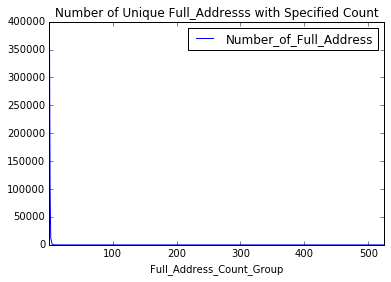

In [18]:
show_analysis(df,'Full_Address')

   Full_Address_Count_Group  Number_of_Full_Address
0                         1                  391063
1                         2                  101668
2                         3                   12306
3                         4                    7590
4                         5                    1606


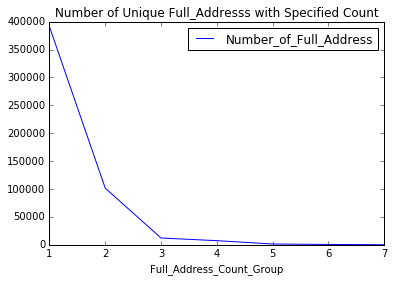

In [19]:
show_analysis(df,'Full_Address',8)

**Phone**

    PHONE_Count_Group  Number_of_PHONE
0                   1           917438
1                   2            29590
2                   3              138
3                   4                6
13                 18                1


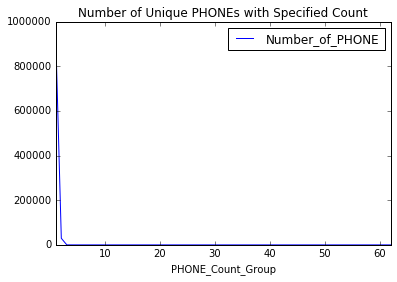

In [20]:
show_analysis(df,'PHONE')

    PHONE_Count_Group  Number_of_PHONE
0                   1           917438
1                   2            29590
2                   3              138
3                   4                6
13                 18                1


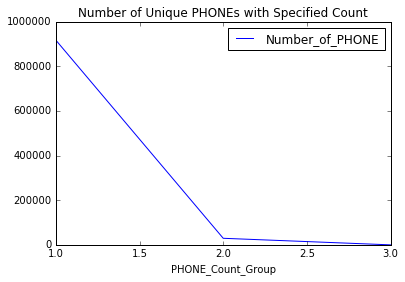

In [21]:
show_analysis(df,'PHONE',4)

**Email**

   EMAIL_Count_Group  Number_of_EMAIL
0                  1           105991
1                  2            14837
2                  3             4966
3                  4             2419
4                  5             1445


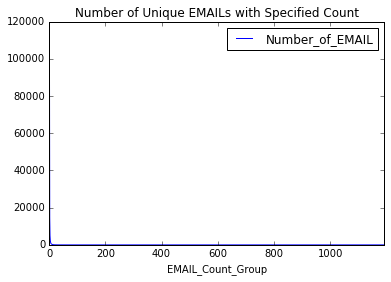

In [22]:
show_analysis(df,'EMAIL')

   EMAIL_Count_Group  Number_of_EMAIL
0                  1           105991
1                  2            14837
2                  3             4966
3                  4             2419
4                  5             1445


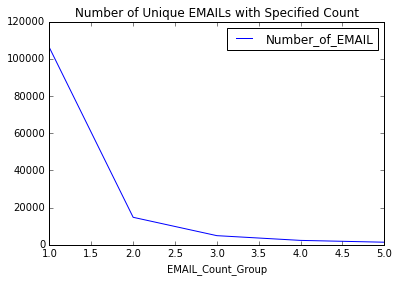

In [23]:
show_analysis(df,'EMAIL',6)